In [63]:
%matplotlib inline

import matplotlib.pyplot as plt

In [105]:
import math
from math import floor, ceil, sqrt

# Custom Infinity Object

In [52]:
class Infinity:
    def __lt__(self, other):
        if (isinstance(other, Infinity)):
            raise TypeError("Cannot compare two infinities!")
        
        return False
    def __gt__(self, other):
        if (isinstance(other, Infinity)):
            raise TypeError("Cannot compare two infinities!")
        
        return True

# Merge Sort

In [14]:
unordered_list = [8, 7, 6, 5, 4, 3, 2, 1]
unordered_list

[8, 7, 6, 5, 4, 3, 2, 1]

In [62]:
def merge_sort(array: list):
    # Base case
    if (len(array) == 1):
        return array
    
    if (len(array) == 2):
        if (array[0] > array[1]):
            # Requires swap
            return [array[1], array[0]]
        # Already sorted
        return array
    
    # Divide
    split_index = floor(len(array) / 2)
    half_1 = merge_sort(array[0:split_index])
    half_2 = merge_sort(array[split_index:])
    
    # Merge back together
    sorted = []
    while(half_1 or half_2):       
        next_half_1 = half_1[0] if half_1 else Infinity()
        next_half_2 = half_2[0] if half_2 else Infinity()
        
        if (next_half_1 < next_half_2):
            sorted.append(next_half_1)
            half_1.remove(next_half_1)
        else:
            sorted.append(next_half_2)
            half_2.remove(next_half_2)
    
    return sorted


sorted = merge_sort(unordered_list)
sorted

[1, 2, 3, 4, 5, 6, 7, 8]

# Closest Pair

In [80]:
coord = [[1, 1], [2, 3], [4, 1], [2,2], [7,2], [9,8]]
xs, ys = zip(*coord) #create lists of x and y values

In [93]:
# Step 1 : sort by our x's, get the median
coord.sort(key=lambda i: i[0])

# Find closest pair on both sides

In [151]:
distances = {}
def find_closest_pair(sorted_coords: list):
    
    # Base Case
    if (len(sorted_coords) <= 3):
        distances_local = {}
        # If we have 3 points, we don't want to get any smaller
        # do n^2 search
        for point1 in sorted_coords:
            for point2 in sorted_coords:              
                # Don't check same point against itself
                if point1 == point2:
                    continue
                    
                # If we've already checked the reverse
                if distances_local.get(f'{point2}->{point1}'):
                    continue
                    
                # Distance formula
                (x1, y1), (x2, y2) = (point1), (point2)
                
                distances_local[f'{point1}->{point2}'] = sqrt((x2-x1)**2 + (y2-y1)**2)
        
        return distances_local
    
    # Divide and conquer
    med = floor(len(coord)/2)
    dist_left = find_closest_pair(sorted_coords[0:med]) # first find left
    dist_right = find_closest_pair(sorted_coords[med:]) # next find right
    
    all_dists = dist_left | dist_right
    
    # Find min distance
    closest_pair, closest_pair_dist = min(iter(all_dists.items()), key=lambda i: i[1])
    print(f'found closest pair candidate: {closest_pair} @ {closest_pair_dist}')
    
    closest_pair_dist_half = closest_pair_dist / 2
    
    # Ensure no closer points cross l
    # filter all where x not more than closest_pair_dist/2 
    checks = filter(sorted_coords, key=lambda i: abs(i[0] -  < closest_pair_dist_half
    
    
    return all_dists

find_closest_pair(coord)

found closest pair candidate: [2, 3]->[2, 2] @ 1.0


{'[1, 1]->[2, 3]': 2.23606797749979,
 '[1, 1]->[2, 2]': 1.4142135623730951,
 '[2, 3]->[2, 2]': 1.0,
 '[4, 1]->[7, 2]': 3.1622776601683795,
 '[4, 1]->[9, 8]': 8.602325267042627,
 '[7, 2]->[9, 8]': 6.324555320336759}

<function abs(x, /)>

### Plot

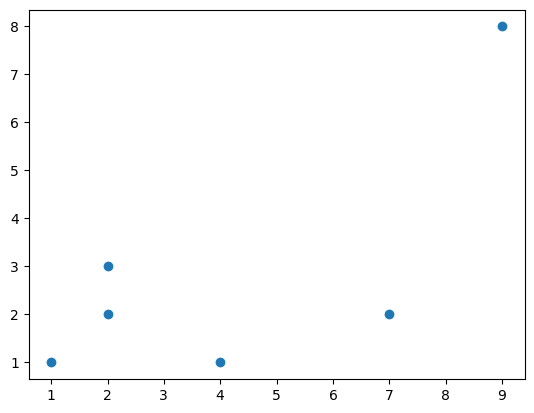

In [78]:
plt.scatter(xs,ys)

# Integer Multiplication

In [203]:
def int_multiply(num1, num2):
    
    if (num1 < 10 or num2 < 10):
        return num1*num2
   
    # digits count
    n = max(len(str(num1)), len(str(num2)))
    n_half = n // 2
    
    # a, b | c, d
    a = num1 // (10**n_half)
    b = num1 % (10**n_half)
    c = num2 // (10**n_half)
    d = num2 % (10**n_half)
    
    ac = int_multiply(a, c)
    bd = int_multiply(b, d)
    ad_plus_bc = int_multiply(a+b, c+d) - ac - bd
    
    return ac * 10**(2*n_half) + (ad_plus_bc)*10**(n_half) + bd
    
    
int_multiply(1313, 271)

355823

# Fast Fourier Transform

In [205]:
from numpy.polynomial import Polynomial as P

In [255]:
import numpy as np

In [384]:
from sympy import sin, cos, pi, N

In [306]:
import json

### Define Polynomial

In [280]:
p = P([-1, -2, 2, 1])
p

Polynomial([-1., -2.,  2.,  1.], domain=[-1,  1], window=[-1,  1])

### Split into Aeven, Aodd

In [441]:
def split_even_odd(p: P) -> (P, P):
    coefs = list(p)
    even = []
    odd = []
    
    # Assume poly is log2
    for i in range(0, len(p), 2):
        even.append(coefs[i])
        odd.append(coefs[i+1])
        
    return P(even), P(odd)

# Includes pulling out x^2
split_even_odd(p)

(Polynomial([-1.,  2.], domain=[-1,  1], window=[-1,  1]),
 Polynomial([-2.,  1.], domain=[-1,  1], window=[-1,  1]))

### Choose Points

In [389]:
def choose_points(n: int) -> list:
    # e^(2pi*i)
    rotation = pi * (2 / n)
    
    # calc n points
    # TODO - invert (x + y), only calc half circle
    points = []
    for point in range(0, n):
        angle = rotation * point
        w = cos(angle) + 1j * sin(angle)        
        points.append(w)
    
    return points
    
choose_points(4)

[1, 1.0*I, -1, -1.0*I]

### Fast Fourier Transform

In [440]:
def fft(p: P) -> list:  
    # degree + 1
    n = len(p)
    n_half = n//2
    
    # Base case
    if n == 1:
        return list(p)
        
    # Get Aeven, Aodd, and recurse
    Aeven, Aodd = split_even_odd(p)
    # print(f'Even: {Aeven} | Odd: {Aodd}')
    Aeven_eval = fft(Aeven)
    Aodd_eval  = fft(Aodd)
    
    # Determine what points we need to calculate
    all_points = choose_points(n)
        
    # Calculate polynomial at these points
    p_eval = [0 for _ in range(0, n)]
    for i in range(0, n_half):
        w = all_points[i]
        
        p_eval[i] = \
            N(Aeven_eval[i] + w * Aodd_eval[i])
        
        p_eval[i + n_half] = \
            N(Aeven_eval[i] - w * Aodd_eval[i])
        
    return p_eval
    
# fft(P([1,2,3,6]))
fft(p)

[0, -3.0 - 3.0*I, 2.00000000000000, -3.0 + 3.0*I]